<h1>Momentum</h1>

Created with JupyterLab

<h2>Table of Contents</h2>
<ul>
<li><a href="#Saddle">Saddle Points</a></li>
<li><a href="#Minima">Local Minima</a></li>
<li><a href="#Noise"> Noise </a></li>
<li><a href="#Training">Training A Neural Network with Momentum</a></li>
<li><a href="#Model">Neural Network Module and Function for Training</a></li>
<li><a href="#Train">Train Different Neural Networks Model different values for the Momentum Parameter</a></li>
<li><a href="#Result">Compare Results of Different Momentum Terms</a></li>
</ul>


<h3>Objective for this Notebook<h3>    
<h5> 1. Learn Saddle Points, Local Minima, and Noise</h5> 
<h5> 2. Train Different Neural Networks Model different values for the Momentum Parameter.</h5>
<h5> 3. Compare Results of Different Momentum Terms. </h5>  



**Momentum optimizes neural networks by accelerating gradient descent via adding a fraction of the previous update to the current update. The momentum technique considers the history of gradients and adjusts the direction and magnitude of future gradients accordingly.
Slow convergence and oscillations around local minima may thus be overcome.**


We'll talk about how we can use momentum to solve the problem with the parameter we are optimizing **being stuck on saddle points**, **being stuck in the local minima.** When learning momentum it is also helpful to learn about the concept of **position velocity and acceleration.**

Here **x denotes the position** of our red ball. The initial position of this red ball is given by x_zero and is zero. The ball is accelerating. We have an **acceleration denoted by a and time denoted by t.** We can get the new position by using the displacement acceleration equation plugging in the value of our new time and we get the position x. This new position is given by x_one. 

**Tracking the position of the red ball is similar to performing gradient descent.** We have the kth iteration of our parameter. **This is the kth position of the ball.** If we have our acceleration term, this is like our gradient. The next iteration of our parameter is the position of the k plus 1 iteration. Everything we are doing for the displacement acceleration equation we can apply to the gradient descent algorithm.

**Velocity is the rate of change in position with respect to time.** Let's look at the case where the velocity is constant. We have a velocity of three and a time interval of two. We can calculate the new position of the ball with the equation of the old position and incrementing it with the product of velocity and time. We get the new position. This is similar to the update rule for gradient descent and momentum. 

**The velocity of k plus one is the velocity at k, plus the acceleration multiplied by the change in time. The velocity term here is used to update the weight when we perform gradient descent using momentum.**

**We use the momentum here to calculate the velocity which we will use to update the weight.** The velocity at the k plus oneth iteration is a sum: the derivative of our cost or loss function with respect to our weight added to the velocity of the previous iteration multiplied by the momentum. **The momentum term represented as the Greek letter rho is a positive number, usually less than one.** We set our initial velocity to be zero. The way for the k plus oneth iteration is updated with the previous weight, minus the learning rate multiplied by the current velocity. The learning rate is represented by the Greek letter eta.

**Here we show that updating our weight with momentum is similar to updating the position of our ball in the presence of acceleration.** The derivative of our loss function with respect to our parameter is analogous to changing in velocity taking acceleration into account. Then we have our parameter weight. This is analogous to changing the position of our ball given the time and current velocity of the ball. We start off with our initial parameter value; we add some velocity. The new position of our ball is similar to the new value of our weight.

We can think of momentum like momentum in physics. The parameter rho is like the mass of the ball. The derivative of the cost or loss is like the force. When we have an object with a small mass, which is equivalent to a small rho, the product of momentum and the previous velocity is small. Adding the derivative of the cost or loss is like adding a force in the opposite direction of the ball. If these two values are equal, the sum of these values is zero. If we have a relatively large object it will take a relatively large amount of force to stop it. A small value for the gradient will not stop the ball. 

Now let's see how momentum can help us solve problems with optimizing neural networks. 

Let's review: Saddle points. **Saddle points are basically a flat point in the surface** Let's use an animation of a ball to represent gradient descent. The horizontal direction represents the value of the weight in which we are optimizing and the vertical direction means is value of the cost. We would like to determine a value for the weight that minimizes the loss function which can be visualized as a ball rolling down to the bottom of the hill giving us a new value for the cost and weight. 

When using **gradient descent we can calculate the gradient, this is similar to how gravity causes the ball to accelerate down the hill.** We update the parameter value using our ball analogy. The ball will roll down the hill representing the change of parameter.

**Now, let's assume we are at the point where the curve for our cost is flat.** As the curve is flat, our gradient is zero. **When we perform gradient descent to update our weight nothing will happen. We will get stuck on the saddle point.** Let's see how momentum helps us overcome this. 

Using momentum, we'll start at this point and we'll calculate our first iteration for the velocity. We calculate initial velocity. We will perform our parameter update. We call the velocity with the learning rate, we continue for the next iteration. **We add the gradient of the cost function to the previous iteration of our velocity. We update the parameter value, the momentum helps us achieve a high velocity in the region where the graph is flat. At this point the gradient is zero. We update the velocity by adding the gradient, even though the gradient is zero, the current velocity is the product of the previous velocity scaled by the momentum.** This allows us to achieve a non-zero velocity for the current iteration. We will continue this process until gradient descent allows us to reach the minimum value of the loss. 

**If we pick a momentum term that's too small, we will get stuck in the saddle point.** We can perform cross-validation to check a momentum term such that we won't get stuck in the saddle point. 

**Local minima is another problem that gradient descent with momentum helps us overcome.** We have a cost function. **There are two points where the gradient might be zero.** Using our ball analogy we have the global minimum: this is the point of the function where the cost is the smallest. **We have the local minimum, which is the smallest point in a small neighborhood. This is where the ball stops rolling, we would like to use momentum not to get stuck in this local minimum.**

At the local minimum, our derivative will be negative. Using our ball analogy it will force the ball to roll in the direction of the local minimum but in this case the velocity term for the momentum is in the opposite direction. **If the momentum term is too small, the ball will get caught in the local minimum and not reach the global minimum. A good value of the momentum term should allow us to reach the global minimum. If we select a momentum term that is large we may overshoot the global minimum.**

<h2>Preparation</h2>


Import the following libraries:

In [1]:
import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

This function will plot a cubic function and the parameter values obtained via Gradient Descent.


In [2]:
# Plot the cubic

def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values 
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction 
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad() 
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='parameter values')

    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

This function will plot a 4th order function and the parameter values obtained via Gradient Descent. You can also add Gaussian noise with a standard deviation determined by the parameter <code>std</code>.


In [3]:
# Plot the fourth order function and the parameter values

def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    
    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    
    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

This is a custom module. It will behave like a single parameter value. We do it this way so we can use PyTorch's build-in optimizers .


In [4]:
# Create a linear model

class one_param(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

We create an object <code>w</code>, when we call the object with an input of one, it will behave like an individual parameter value. i.e <code>w(1)</code> is analogous to $w$ 


In [5]:
# Create a one_param object

w = one_param(1, 1)

<h2 id="Saddle">Saddle Points</h2>


Let's create a cubic function with Saddle points 


In [6]:
# Define a function to output a cubic 

def cubic(yhat):
    out = yhat ** 3
    return out

We create an optimizer with no momentum term 


In [7]:
# Create a optimizer without momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)

We run several iterations of stochastic gradient descent and plot the results. We see the parameter values get stuck in the saddle point.


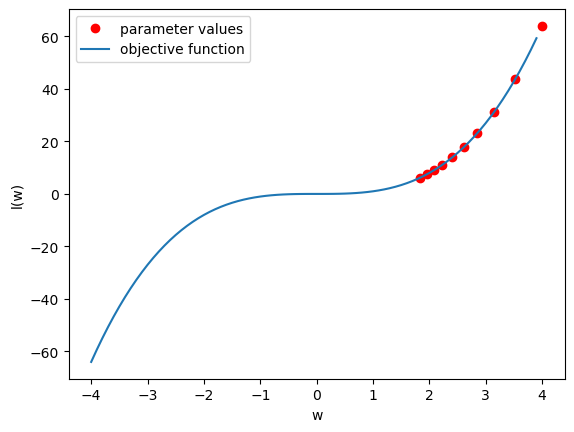

In [8]:
# Plot the model

plot_cubic(w, optimizer)

we create an optimizer with momentum term of 0.9


In [9]:
# Create a optimizer with momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)

We run several iterations of stochastic gradient descent with momentum and plot the results. We see the parameter values do not get stuck in the saddle point.


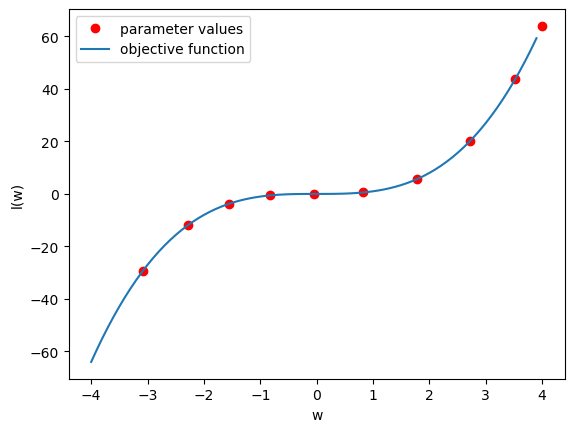

In [10]:
# Plot the model

plot_cubic(w, optimizer)

<h2 id="Minima">Local Minima</h2>


In this section, we will create a fourth order polynomial with a local minimum at <i>4</i> and a global minimum a <i>-2</i>. We will then see how the momentum parameter affects convergence to a global minimum. The fourth order polynomial is given by:


In [11]:
# Create a function to calculate the fourth order polynomial 

def fourth_order(yhat): 
    out = torch.mean(2 * (yhat ** 4) - 9 * (yhat ** 3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

We create an optimizer with no momentum term. We run several iterations of stochastic gradient descent and plot the results. We see the parameter values get stuck in the local minimum.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


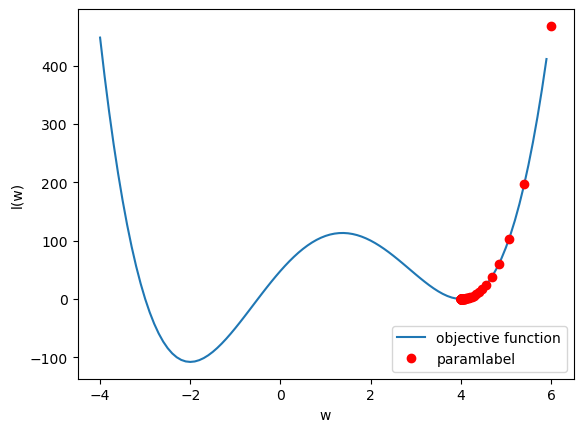

In [12]:
# Make the prediction without momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)

We create an optimizer with a  momentum term of 0.9. We run several iterations of stochastic gradient descent and plot the results. We see the parameter values reach a global minimum.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


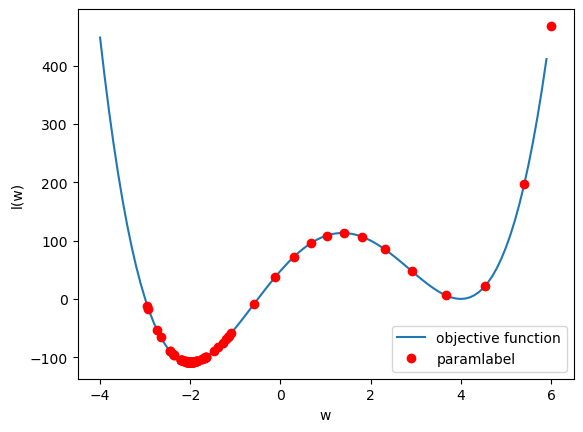

In [13]:
# Make the prediction with momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

<h2 id="Noise">Noise</h2>


In this section, we will create a fourth order polynomial with a local minimum at 4 and a global minimum a -2, but we will add noise to the function when the Gradient is calculated. We will then see how the momentum parameter affects convergence to a global minimum. 


with no momentum, we get stuck in a local minimum 


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


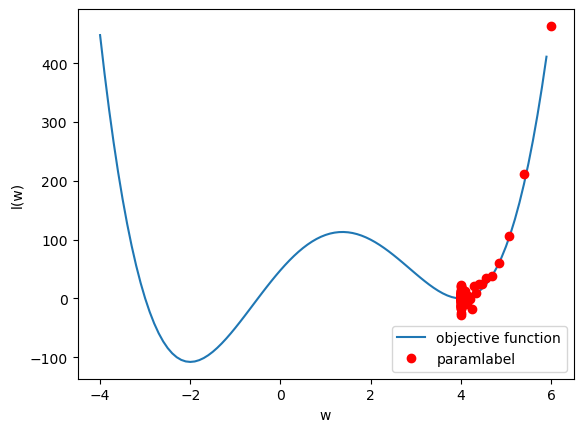

In [14]:
# Make the prediction without momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

with  momentum, we get to the global  minimum 


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


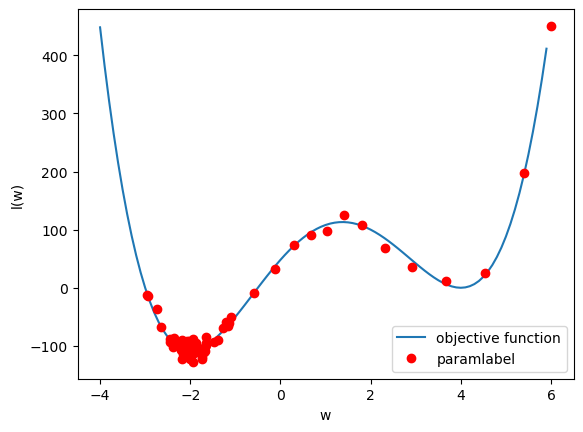

In [15]:
# Make the prediction with momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001,momentum=0.9)
plot_fourth_order(w, optimizer, std=10)

Create two <code> SGD</code>  objects with a learning rate of <code> 0.001</code>. Use the default momentum parameter value  for one and a value of <code> 0.9</code> for the second. Use the function <code>plot_fourth_order</code> with an <code>std=100</code>, to plot the different steps of each. Make sure you run the function on two independent cells.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


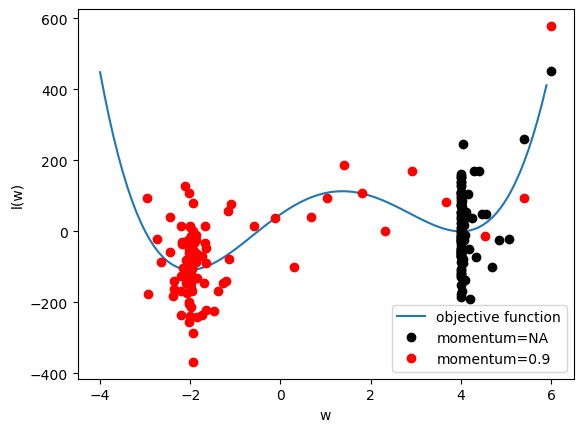

In [16]:
# Practice: Create two SGD optimizer with lr = 0.001, and one without momentum and the other with momentum = 0.9. Plot the result out.
optimizer1 = torch.optim.SGD(w.parameters(), lr = 0.001)
plot_fourth_order(w, optimizer1, std = 100, color = 'black', paramlabel = 'parameter values with optimizer 1')

optimizer2 = torch.optim.SGD(w.parameters(), lr = 0.001, momentum = 0.9)
plot_fourth_order(w, optimizer2, std = 100, color = 'red', paramlabel = 'parameter values with optimizer 2', objfun = False)

plt.legend(("objective function", "momentum=NA", "momentum=0.9"))

<h1 id = "Training">Training A Neural Network with Momentum</h1>

<h2>Preparation</h2>


We'll need the following libraries:  


In [17]:
#!pip3 install torch torchvision torchaudio

In [18]:
# Used to graph data and loss curves
import matplotlib.pyplot as plt 
# Allows us to use arrays to manipulate and store data
import numpy as np
# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
# Allows us to use activation functions
import torch.nn.functional as F
# Used to graph data and loss curves
from matplotlib.colors import ListedColormap
# Used to help create the dataset and perform mini-batch
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)
np.random.seed(1)

Functions used to plot:


In [19]:
# Define a function to plot the decision region

def plot_decision_regions_3class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
    X=data_set.x.numpy()
    y=data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX=torch.torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    _,yhat=torch.max(model(XX),1)
    yhat=yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light, shading='auto')
    plt.plot(X[y[:]==0,0], X[y[:]==0,1], 'ro', label='y=0')
    plt.plot(X[y[:]==1,0], X[y[:]==1,1], 'go', label='y=1')
    plt.plot(X[y[:]==2,0], X[y[:]==2,1], 'o', label='y=2')
    plt.title("decision region")
    plt.legend()

Create the dataset class: We will display the dataset later below


In [20]:
# Create the dataset class

class Data(Dataset):
    
    # modified from: http://cs231n.github.io/neural-networks-case-study/
    # Constructor
    def __init__(self, K=3, N=500):
        D = 2
        X = np.zeros((N * K, D)) # data matrix (each row = single example)
        y = np.zeros(N * K, dtype='uint8') # class labels
        for j in range(K):
          ix = range(N * j, N * (j + 1))
          r = np.linspace(0.0, 1, N) # radius
          t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
          X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
          y[ix] = j
    
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = y.shape[0]
            
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the diagram
    def plot_data(self):
        plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'ro', label="y=1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(),self.x[self.y[:] == 2, 1].numpy(), 'go',label="y=2")
        plt.legend()

<h2 id="Model">Neural Network Module and Function for Training</h2>


Create Neural Network Module using <code>ModuleList()</code>


In [21]:
# Create dataset object

class Net(nn.Module):
    
    # Constructor
    # Given a list of integers, Layers, we create layers of the neural network where each integer in Layers corresponds to the layers number of neurons
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
    
    # Prediction
    # Puts the X value through each layer of the neural network while using the RELU activation function in between. The final output is not put through RELU.
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))    
            else:
                x = linear_transform(x)
        return x

Create the function for training the model.


In [22]:
# Define the function for training the model

def train(data_set, model, criterion, train_loader, optimizer, epochs=100):
    # Lists to keep track of loss and accuracy
    LOSS = []
    ACC = []
    # Number of times we train on the entire dataset
    for epoch in range(epochs):
        # For batch in train laoder
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on X value
            yhat = model(x)
            # Measures the loss between prediction and acutal Y value
            loss = criterion(yhat, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
        # Saves loss and accuracy
        LOSS.append(loss.item())
        ACC.append(accuracy(model,data_set))
        
    # Prints the Loss and Accuracy vs Epoch graph
    results ={"Loss":LOSS, "Accuracy":ACC}
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(LOSS,color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis = 'y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()
    return results

Define a function used to calculate accuracy.


In [23]:
# Define a function for calculating accuracy
def accuracy(model, data_set):
    _, yhat = torch.max(model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

<h2 id="Train">Train Different Networks Model different values for the Momentum Parameter</h2>


Create a dataset object using <code>Data</code>


In [24]:
# Create the dataset and plot it
data_set = Data()
#data_set.plot_data()
#data_set.y = data_set.y.view(-1)

Dictionary to contain different cost and  accuracy values for each epoch  for different values of the momentum parameter.


In [25]:
# Initialize a dictionary to contain the cost and accuracy

Results = {"momentum 0": {"Loss": 0, "Accuracy:": 0}, "momentum 0.1": {"Loss": 0, "Accuracy:": 0}}

Create a  network to classify three classes with **1 hidden layer with 50 neurons and a momentum value of zero.**

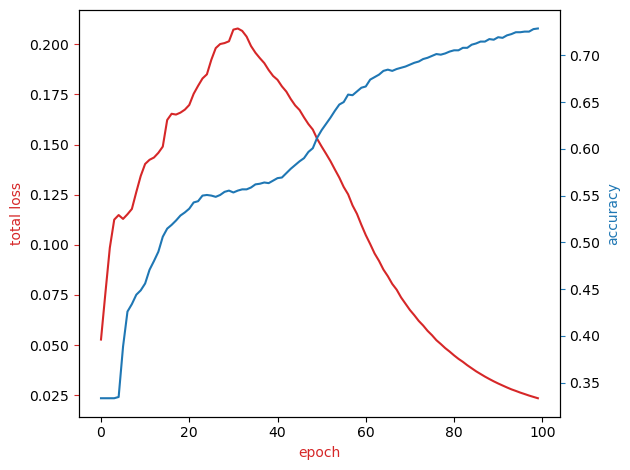

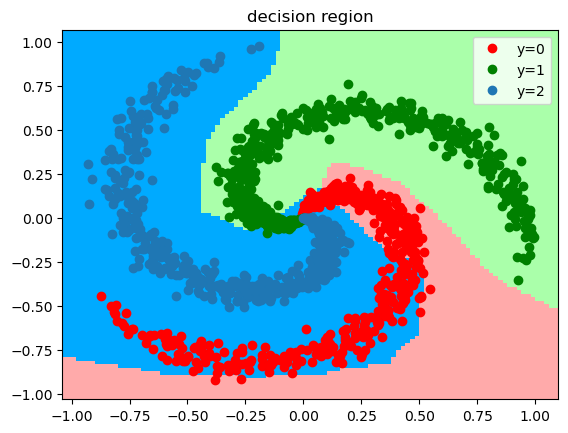

In [26]:
# Train a model with 1 hidden layer and 50 neurons

# Size of input layer is 2, hidden layer is 50, and output layer is 3
# Our X values are x and y coordinates and this problem has 3 classes
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and no momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

Create a network to classify three classes with 1 hidden layer with 50 neurons and a momentum value of 0.1.




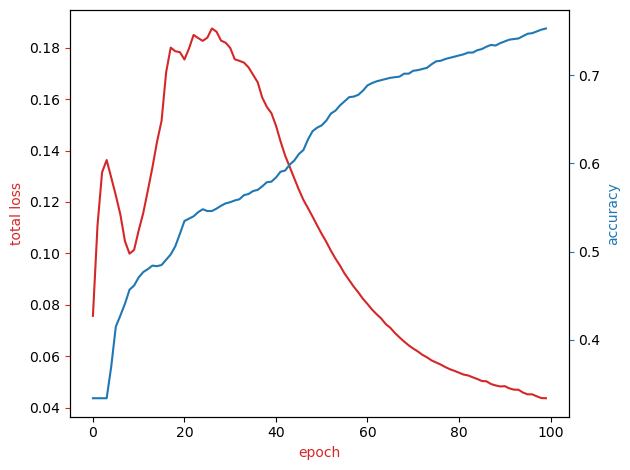

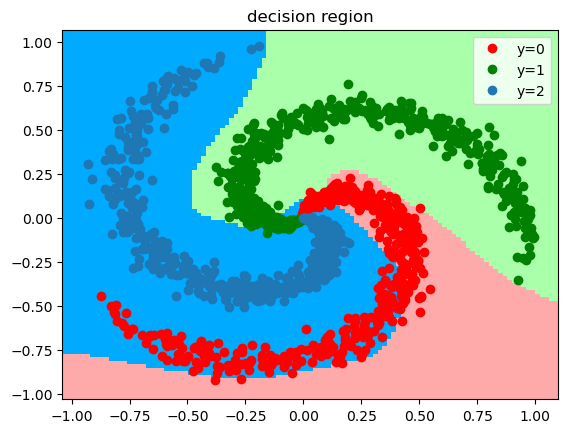

In [27]:
# Train a model with 1 hidden layer and 50 neurons with 0.1 momentum

# Size of input layer is 2, hidden layer is 50, and output layer is 3
# Our X values are x and y coordinates and this problem has 3 classes
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and 0.1 momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.1)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0.1"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)


Create a network to classify three classes with 1 hidden layer with 50 neurons and a momentum value of 0.2.


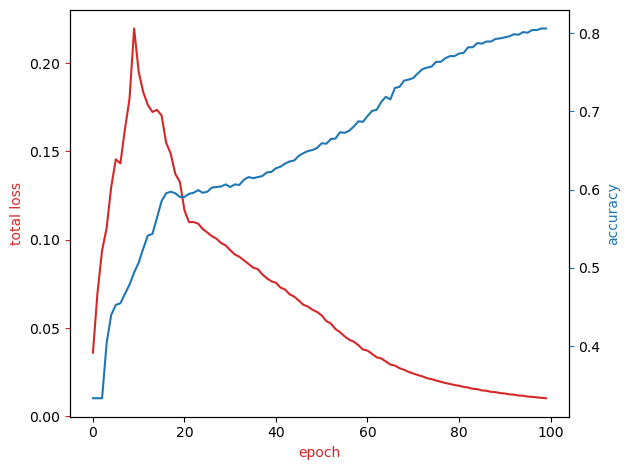

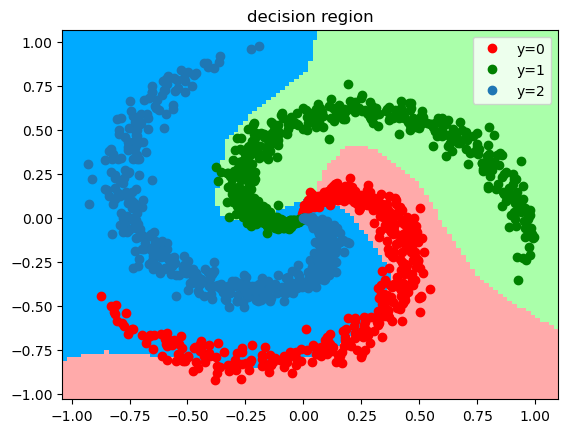

In [28]:
# Train a model with 1 hidden layer and 50 neurons with 0.2 momentum

# Size of input layer is 2, hidden layer is 50, and output layer is 3
# Our X values are x and y coordinates and this problem has 3 classes
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and 0.2 momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.2)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0.2"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

Create a network to classify three classes with 1 hidden layer with 50 neurons and a momentum value of 0.4.


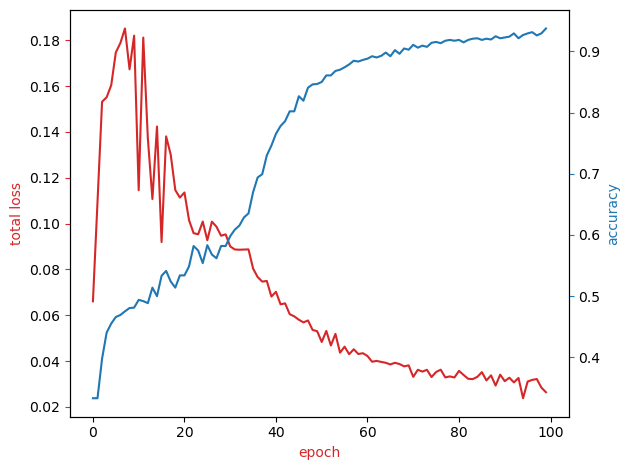

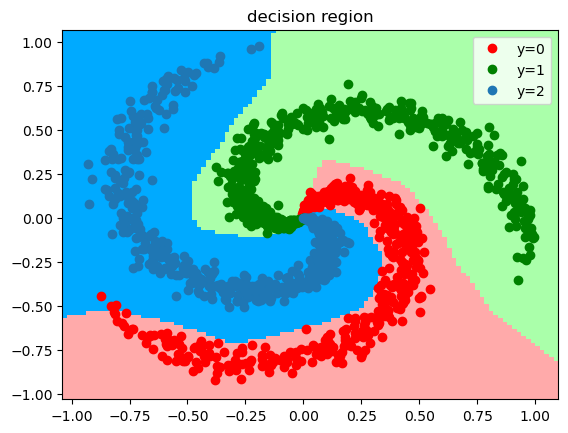

In [29]:
# Train a model with 1 hidden layer and 50 neurons with 0.4 momentum

# Size of input layer is 2, hidden layer is 50, and output layer is 3
# Our X values are x and y coordinates and this problem has 3 classes
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and 0.4 momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.4)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0.4"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

Create a network to classify three classes with 1 hidden layer with 50 neurons and a momentum value of 0.5.


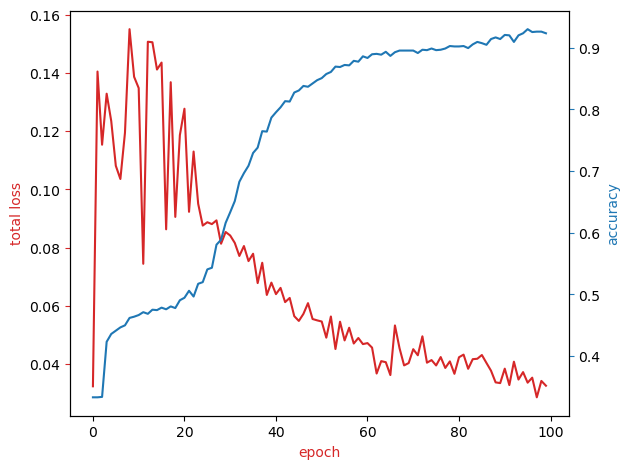

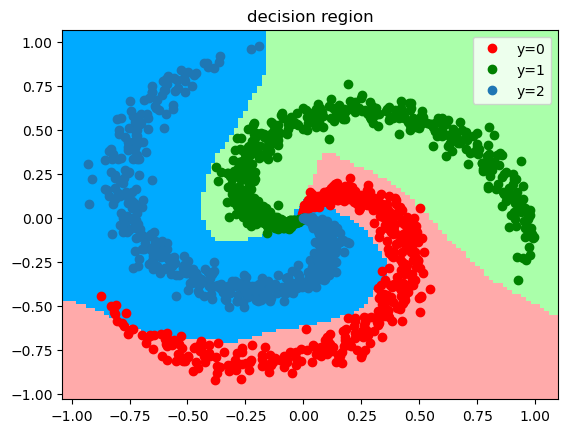

In [30]:
# Train a model with 1 hidden layer and 50 neurons with 0.5 momentum

# Size of input layer is 2, hidden layer is 50, and output layer is 3
# Our X values are x and y coordinates and this problem has 3 classes
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and 0.5 momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0.5"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

<!--Empty Space for separating topics-->


<h2 id="Result">Compare Results of Different Momentum Terms</h2>


The plot below compares the results of different momentum terms. **We see that in general, the Cost decreases proportionally to the momentum term, but larger momentum terms lead to larger oscillations.** While the momentum term decreases faster, it seems that a momentum term of 0.2 reaches the smallest value for the cost. 


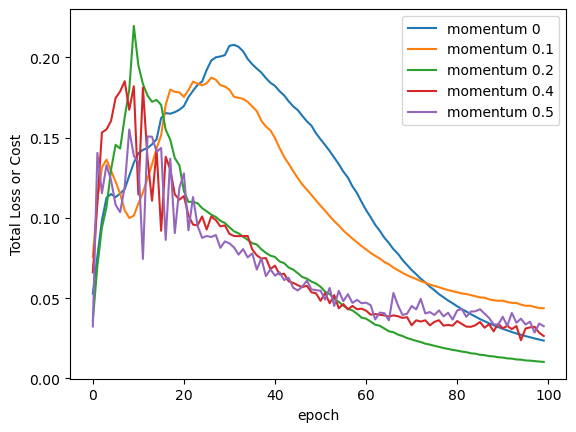

In [31]:
# Plot the Loss result for each term
for key, value in Results.items():
    plt.plot(value['Loss'],label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Total Loss or Cost')

The  accuracy seems to be proportional to the momentum term.


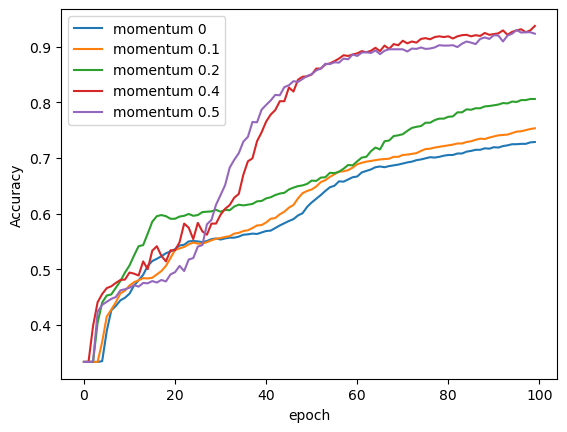

In [32]:
# Plot the Accuracy result for each term

for key, value in Results.items():
    plt.plot(value['Accuracy'],label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')

<!--Empty Space for separating topics-->


# Authors' rights

Machine Learning with Python course by IBM on Coursera: https://www.coursera.org/learn/machine-learning-with-python/

Completed and modified by Mathilde Marie Duville as part of the IBM Artificial Intelligence Engineering Professional Certificate and corresponding IBM badges. Please, follow the subsequent links to confirm the accreditation:

https://www.coursera.org/account/accomplishments/professional-cert/KSLW773DAATP?utm_source=link&utm_medium=certificate&utm_content=cert_image&utm_campaign=sharing_cta&utm_product=prof

https://www.credly.com/users/mathilde-marie-duville/badges

-------------------------------------------------------------------------------------------------------------------------------------------

Author: <a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>


## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-23  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
